In [257]:
import IPython

In [258]:
import sklearn

In [259]:
print(sklearn.__version__)

0.18.1


In [260]:
import mglearn1

In [261]:
import numpy as np
import pandas as pd
import os
from scipy import signal
from sklearn.datasets import load_boston, make_blobs
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import matplotlib as mpl

In [262]:
list1=np.array([1,2,3,4,5])
list2=np.array([101,102,103,104,105,106,107])
list3=np.array(['a','b'])
for i in zip(list1,list2,list3):
    print(i)

(1, 101, 'a')
(2, 102, 'b')


In [263]:
my_list=['Ranchi','Patna','Jamshedpur']
for counter,value in enumerate(my_list,1):
    print('Counter {} Value is {}'.format(counter,value))

Counter 1 Value is Ranchi
Counter 2 Value is Patna
Counter 3 Value is Jamshedpur


X Shape is (26, 2)


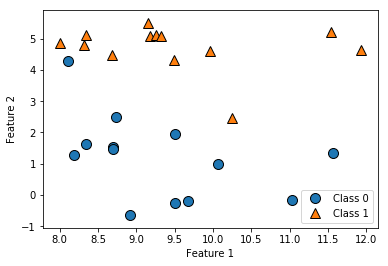

In [264]:
# generate dataset
%matplotlib inline
X, y = mglearn1.datasets.make_forge()
# Plot Dataset
mglearn1.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4,numpoints=1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
print("X Shape is {}".format(X.shape))


# Fig 2.3

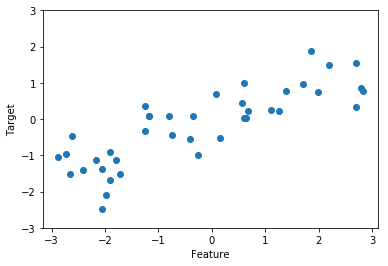

In [265]:
%matplotlib inline
X,y = mglearn1.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")


In [266]:
#Fig 2.3 To Illustraate Regression Problem
rnd= np.random.RandomState(42)
n_sample_size=40
x= rnd.uniform(-3,3,n_sample_size)
y_no_noise=(x+np.sin(4*x))
y=(rnd.normal(n_sample_size)+y_no_noise)/2
x

array([-0.75275929,  2.70428584,  1.39196365,  0.59195091, -2.06388816,
       -2.06403288, -2.65149833,  2.19705687,  0.60669007,  1.24843547,
       -2.87649303,  2.81945911,  1.99465584, -1.72596534, -1.9090502 ,
       -1.89957294, -1.17454654,  0.14853859, -0.40832989, -1.25262516,
        0.67111737, -2.16303684, -1.24713211, -0.80182894, -0.26358009,
        1.71105577, -1.80195731,  0.08540663,  0.55448741, -2.72129752,
        0.64526911, -1.97685526, -2.60969044,  2.69331322,  2.7937922 ,
        1.85038409, -1.17231738, -2.41396732,  1.10539816, -0.35908504])

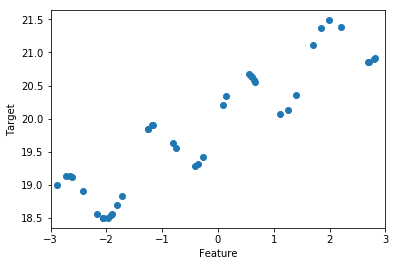

In [267]:
plt.plot(x.reshape(-1,1),y,'o')
plt.xlim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

# Cancer Example from Scikit Learn

In [268]:
from sklearn.datasets import load_breast_cancer

In [269]:
cancer = load_breast_cancer()

In [270]:
print("Keys of the Object Cancer :\n{}".format(cancer.keys()))

Keys of the Object Cancer :
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [271]:
cancer.DESCR[:10]

'Breast Can'

In [272]:
cancer.feature_names.size

30

In [273]:
# How many counts have in each target
print("Sample of counts per Class: \n{}".format({n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample of counts per Class: 
{'malignant': 212, 'benign': 357}


In [274]:
a= [1,2,3]
b=[10,11,12]
zipped=zip(a,b)

In [275]:
for i,v in zipped:
    print(i,v)

1 10
2 11
3 12


# Boston Housing Dataset

In [276]:
from sklearn.datasets import load_boston

In [277]:
boston = load_boston()

In [278]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [279]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [280]:
boston.data.shape

(506, 13)

In [281]:
# We will do the feature Engineering
a=np.array([[0,1,2],
          [2,1,1],
          [3,1,2]])


In [282]:
a=np.float64(a)

In [283]:
min_max_scalar= MinMaxScaler()

In [284]:
min_max_scalar.fit_transform(a)

array([[ 0.        ,  0.        ,  1.        ],
       [ 0.66666667,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        ]])

In [285]:
# Normalize this

## 1. Normalize Boston Housing data ###
## 2. Add Polynomial Degree by 2

In [286]:
X=boston.data
X=MinMaxScaler().fit_transform(X)


In [287]:
X[1,:]

array([  2.35922539e-04,   0.00000000e+00,   2.42302053e-01,
         0.00000000e+00,   1.72839506e-01,   5.47997701e-01,
         7.82698249e-01,   3.48961980e-01,   4.34782609e-02,
         1.04961832e-01,   5.53191489e-01,   1.00000000e+00,
         2.04470199e-01])

In [288]:
X.shape

(506, 13)

In [289]:
X=PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

In [290]:
X.shape

(506, 104)

In [291]:
y=boston.target

In [292]:
y.shape

(506,)

# K-Nearest Neighbour

In [293]:
X,y=make_blobs(n_samples=30,random_state=4,centers=2)

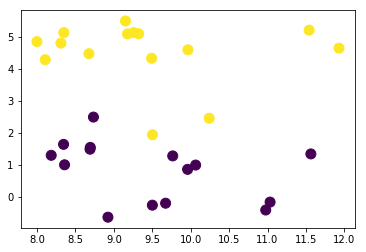

In [294]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)


In [295]:
y[np.array([7,27])]=0

In [296]:
mask=np.ones(len(X),dtype=bool)

In [297]:
mask[np.array([0,1,5,26])]=0
X,y=X[mask],y[mask]

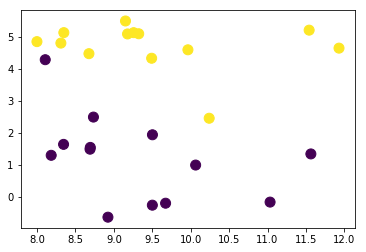

In [298]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [299]:
from sklearn.cross_validation import train_test_split

In [300]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [301]:
X_train.shape,X_test.shape

((19, 2), (7, 2))

In [302]:
from sklearn.neighbors import KNeighborsClassifier

In [303]:
clf=KNeighborsClassifier(n_neighbors=1)

In [304]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [305]:
print("Test Prediction \n{}".format(clf.predict(X_test)))

Test Prediction 
[1 0 1 0 1 0 0]


In [306]:
print("Accuracy is :{:.2f}".format(clf.score(X_test,y_test)))

Accuracy is :0.86


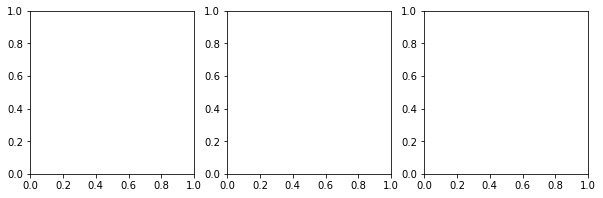

In [307]:
fig,axes=plt.subplots(1,3,figsize=(10,3))

In [308]:
%matplotlib inline
from mglearn1 import *

In [309]:
# Check Cycler concept
current_cycler = mpl.rcParams['axes.prop_cycle']
y_unique=np.unique(y)
for i, (yy, cycle) in enumerate(zip(y_unique,current_cycler())):
    print('í ={} , yy {} and cycle {}'.format(i,yy,cycle))
cycle['color']

í =0 , yy 0 and cycle {'color': '#1f77b4'}
í =1 , yy 1 and cycle {'color': '#ff7f0e'}


'#ff7f0e'

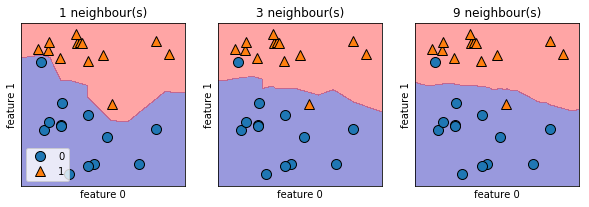

In [310]:
fig,axes=plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn1.plot_2d_separator.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn1.plot_helpers.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbour(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3,numpoints=1)

# Let's evaluate model complexity upon breast Cancer data

In [311]:
from sklearn.datasets import load_breast_cancer

In [312]:
cancer= load_breast_cancer()

In [313]:
cancer.data.shape

(569, 30)

In [314]:
cancer.target.shape

(569,)

In [315]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [316]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

In [317]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target)

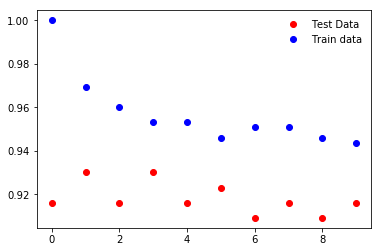

In [318]:
iter=range(1,11)
test_accuracy=[]
train_accuracy=[]
for i in iter:
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(range(len(test_accuracy)),test_accuracy,'ro',label='Test Data')
plt.plot(range(len(train_accuracy)),train_accuracy,'bo',label='Train data')
plt.legend(loc=1,numpoints=1,frameon=False)

# Testing KNN Regression 

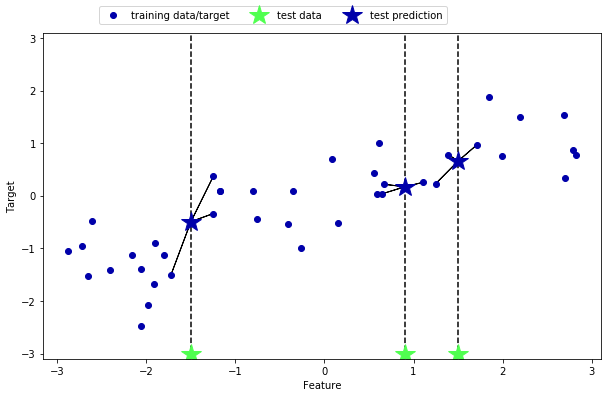

In [319]:
mglearn1.plots.plot_knn_regression(n_neighbors=3)

## How to evaluate the regresssion using KNN Regression
- Create a wave of 40-50 numbers
- Its 2 dimesnional wave
- We will get pattern as above and 
- Predict the value at certain x values

In [320]:
from sklearn.neighbors import KNeighborsRegressor

In [321]:
X,y = mglearn1.datasets.make_wave(40)

In [322]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [323]:
reg=KNeighborsRegressor(n_neighbors=3)

In [324]:
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [325]:
print('Test set prediction is :{}'.format(reg.predict(X_test)))

Test set prediction is :[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


## Calculate R sqaure - R$^2$
### This measures the goodness of regression

In [326]:
 print('Test set R^2 is {:.2f}'.format(reg.score(X_test,y_test)))

Test set R^2 is 0.83


## Loop through 1,3,9 etc. neighbours to calculate accuracy for KNN Regression

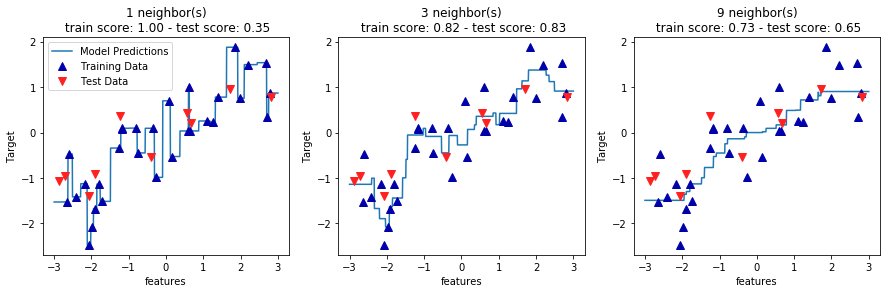

In [327]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
#create 1000 data points and their prediction to draw line , compare other data points with line relative to the accuracy, quality of fitment etc.
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors , ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn1.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn1.cm2(1),markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} - test score: {:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("features")
    ax.set_ylabel("Target")
axes[0].legend(["Model Predictions","Training Data","Test Data"],loc="best")



w[0]: 0.393906  b: -0.031804


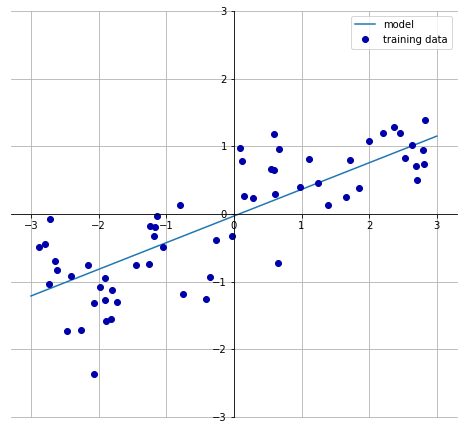

In [328]:
mglearn1.plots.plot_linear_regression_wave()

In [329]:
from sklearn.linear_model import LinearRegression
X,y = mglearn1.datasets.make_wave(60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [330]:
print('lr.coef_ : {}'.format(lr.coef_))
print('lr.intercept_ :{:.2f}'.format(lr.intercept_))

lr.coef_ : [ 0.39390555]
lr.intercept_ :-0.03


In [331]:
# Score 
print('Training set Score :{:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score :{:.2f}'.format(lr.score(X_test,y_test)))

Training set Score :0.67
Test set score :0.66


## In the above examples , we have taken one attribute only so both training and testing set underfit the model

### In the next example we can use BOSTON HOUSING DATASET that uses 2 degree polynomial set 

In [332]:
boston = load_boston()
x=boston.data
X=MinMaxScaler().fit_transform(boston.data)
pd.DataFrame(x,columns=boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [333]:
dfX=pd.DataFrame(X,columns=boston.feature_names)

In [334]:
X=PolynomialFeatures(degree=2,include_bias=False).fit_transform(X)

In [335]:
X.shape

(506, 104)

In [336]:
y= boston.target

In [337]:
dftemp=pd.DataFrame(X)

In [338]:
dftemp['target']=y

In [339]:
dftemp.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868,36.2


In [340]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [341]:
lr=LinearRegression().fit(X_train,y_train)

In [342]:
lr.score(X_test,y_test)

0.60577548929354719

In [343]:
lr.score(X_train,y_train)

0.95235264368642403

In [344]:
lr.coef_.max(),lr.coef_.min()

(2895.0539118819388, -2246.0030575934788)

## Above example uses 2 degree polynomial function and performs linear regression upon all attrobutes i.e. 104 , Training model gets very good score but Test set suffers
### This is the clear example of Overfitting

## Regularization (Adding restriction or constraint to avoid overfitting)
### As we saw , testing dataset yielded bad result but training set gave good result is clearly the case of OVERFITTING, In order to reduce the sensitivity or overfitting , we can start regularizing the model. This means we can chose 'w' smal enough or slop should be low so that change in data points should not yield big change in the response

### We use RIDGE Regression  - It not only fits training data but also fits additional constraint 
### L2 Regularization

In [345]:
# Apply Ridge to the same extended boston feature set
from sklearn.linear_model import Ridge

In [346]:
ridge= Ridge().fit(X_train,y_train)
print(' Training set Score : {:.2f}'.format(ridge.score(X_train,y_train)))
print('Test Set Score      : {:.2f}'.format(ridge.score(X_test,y_test)))

 Training set Score : 0.89
Test Set Score      : 0.75


### The above Test Score is better than the previous model , we introduced the regularization parameter by running RIDGE model --> low 'w'. This however scored poorer for training set . Net of the net --> We improved TEST and decreased the Training Score --> Less Overfit

### ALPHA = We can manuever by fluctuating alpha to fine tune the model. Higher ALPHA meaning --> 'w' towards 0--> Poor in training SCORE --> Better Generalization

In [347]:
ridge10= Ridge(alpha=10).fit(X_train,y_train)
print(' Training set Score : {:.2f}'.format(ridge10.score(X_train,y_train)))
print('Test Set Score      : {:.2f}'.format(ridge10.score(X_test,y_test)))

 Training set Score : 0.79
Test Set Score      : 0.64


In [348]:
ridge01= Ridge(alpha=.1).fit(X_train,y_train)
print(' Training set Score : {:.2f}'.format(ridge01.score(X_train,y_train)))
print('Test Set Score      : {:.2f}'.format(ridge01.score(X_test,y_test)))

 Training set Score : 0.93
Test Set Score      : 0.77


In [349]:
ridge10.coef_[:10]

array([-0.8136899 ,  0.6476241 , -0.80906937,  0.31119823, -0.68592593,
        4.38593449, -0.14744567, -2.44271803,  0.84635301, -1.1469339 ])

In [350]:
ridge.coef_.max(),ridge.coef_.min()

(16.6517201836342, -8.6005716205151721)

In [351]:
ridge10.coef_.min(),ridge10.coef_.max(),ridge10.coef_.mean()

(-3.9847610831289706, 7.0268308718103114, -0.2916361143830451)

In [352]:
ridge01.coef_.max(),ridge01.coef_.min(),ridge01.coef_.mean()

(24.277342235478052, -18.180329914076033, -0.22493698130802128)

### As per the result above...higher ALPHA means --> lower 'w'-->Higher Generalization --> more Restricted model

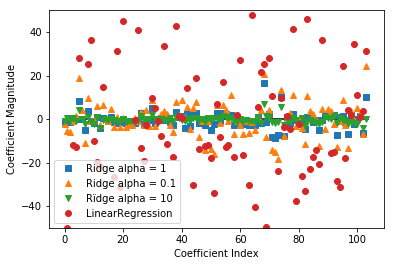

In [353]:
plt.plot(ridge.coef_,'s',label="Ridge alpha = 1")
plt.plot(ridge01.coef_,'^',label="Ridge alpha = 0.1")
plt.plot(ridge10.coef_,'v',label="Rïdge alpha = 10")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-50,50)

plt.legend(loc='best')

## Lasso

In [354]:
from sklearn.linear_model import Lasso

In [355]:
lasso = Lasso().fit(X_train,y_train)

In [356]:
print("Training Set Score {:.2f}".format(lasso.score(X_train,y_train)))
print("Testing set score {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used {}".format(np.sum(lasso.coef_!=0)))

Training Set Score 0.29
Testing set score 0.21
Number of features used 4


In [357]:
lasso001=Lasso(alpha = 0.001,max_iter=100000).fit(X_train,y_train)

In [358]:
print("Training Set Score {:.2f}".format(lasso001.score(X_train,y_train)))
print("Testing set score {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used {}".format(np.sum(lasso001.coef_!=0)))

Training Set Score 0.94
Testing set score 0.74
Number of features used 69


In [359]:
lasso01=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)

In [360]:
lasso0001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)

## Now draw plots for different co-efficients

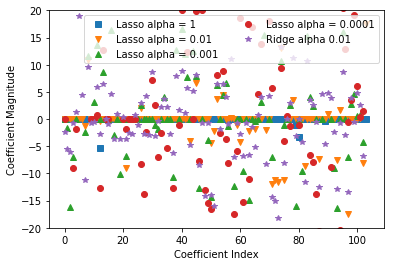

In [361]:
plt.plot(lasso.coef_,'s',label='Lasso alpha = 1')
plt.plot(lasso01.coef_,'v',label='Lasso alpha = 0.01')
plt.plot(lasso001.coef_,'^',label='Lasso alpha = 0.001')
plt.plot(lasso0001.coef_,'o',label='Lasso alpha = 0.0001')

plt.plot(ridge01.coef_,'*',label='Ridge alpha 0.01')

plt.ylim(-20,20)


plt.hlines(0,0,len(lasso.coef_))
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(ncol=2,loc='best')

## Linear Model for classification

In [362]:
m=np.array([2,3])



In [363]:
m.reshape(1,-1).shape

(1, 2)

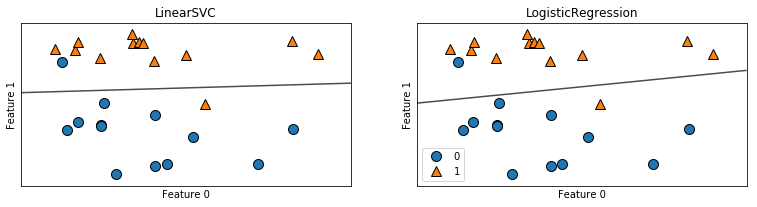

In [364]:
# Use Logistic Regression and SVC - Supprt Vector Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn1.datasets.make_forge()
fig,axes=plt.subplots(1,2,figsize=(13,3))

for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    # Tested below function
    #plot_2d_separator_nir(clf,X,fill=False,ax=ax,eps=0.5,alpha=0.7)
    
    mglearn1.plots.plot_2d_separator(clf,X,fill=False,ax=ax,eps=0.5,alpha=0.7)
    mglearn1.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

ax.legend(loc='best')
    
    

In [365]:
# Want to build a contour to visualize 
#1 - build 1000 points in the range of X[0] and X[1]
#2 - Prepare coordinates from meshgrid
#3 - Calculate Decision Value from the classifier
#4 - Build Contour and carry out visualization

def plot_2d_separator_nir(classifier,X,fill=False,ax=None,eps=None,alpha=1,linewidth=None,threshold=None,linestyle="solid"):
    if eps==None:
        eps=X.std()/2
    if ax==None:
        ax=plt.gca()
        
    x_min,x_max=X[:,0].min()-eps,X[:,0].max()+eps
    y_min,y_max=X[:,1].min()-eps,X[:,1].max()+eps
    xx=np.linspace(x_min,x_max,1000)
    yy=np.linspace(y_min,y_max,1000)
    
    X1,X2=np.meshgrid(xx,yy)
    X_grid = np.c_[X1.ravel(),X2.ravel()]
    
    try:
        decision_values=classifier.decision_function(X_grid)
        levels=[0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()]+[levels]+[decision_values.max()]
    except AttributeError:
        decision_values=classifier.predict_proba(X_grid)[:,1]
        levels=[.5] if threshold is None else [threshold]
        fill_levels=[0]+levels+[1]
        
    if fill:
        ax.contourf(X1,X2,decision_values.reshape(X1.shape),levels=fill_levels,alpha=alpha)
    else:
        ax.contour(X1,X2,decision_values.reshape(X1.shape),levels=levels,colors='blue',alpha=alpha,linewidths=linewidth,
                  linestyles=linestyle,zorder=5)
    
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [366]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\Niraj Kumar\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

### C=1/Regularization ---Higher C --> Less Regularization strength

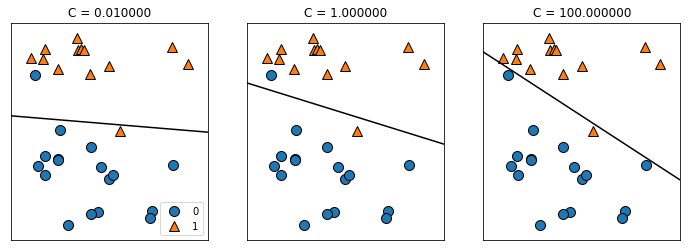

In [367]:
mglearn1.plots.plot_linear_svc_regularization()

### In the above figure -
- When C is very less = 0.01, this means we are increasing the regularization so the classifier is almost horizontal
- When C is incraesed, we are decreasing the Reggularization so training set is getting better classified
- When C is very high , that  means we have decraesed the regularization and figure shows it overfts the training data set

In [368]:
svm.coef_

array([[ 0.39514907,  0.97024723]])

In [369]:
# Lets practice 
#1 create data blob
#2 Derive feature sets X[0] and X[1]
#3 Fit SVC model
#4 Draw classifier lines

X,y=mglearn1.datasets.make_blobs(n_samples=30,n_features=2,centers=2,random_state=4)
y[7]=0
y[27]=0

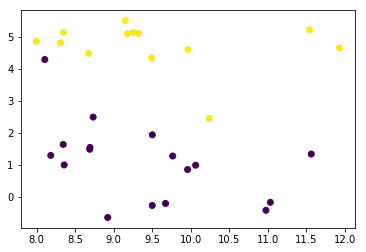

In [370]:
plt.scatter(X[:,0],X[:,1],c=y)

In [371]:
from sklearn.svm import SVC

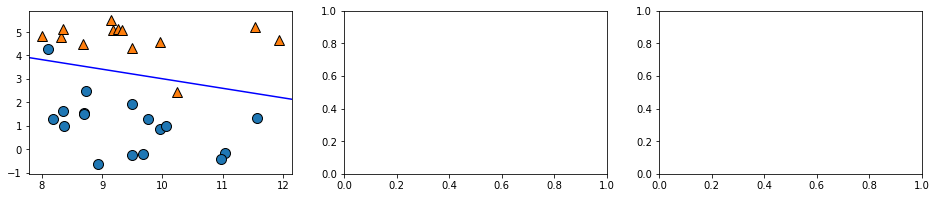

In [372]:
fig,ax=plt.subplots(1,3,figsize=(16,3))

mglearn1.discrete_scatter(X[:,0],X[:,1],y,ax=ax[0])
svm=SVC(kernel='linear',C=1,tol=0.00001).fit(X,y)

w=svm.coef_[0]
a=-w[0]/w[1]

xx=np.linspace(6,13)
yy=a*xx - svm.intercept_[0]/w[1]
ax[0].plot(xx,yy,c='b')

## We test for higer dimensions , features

In [373]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [374]:
cancer=load_breast_cancer()

In [380]:
X_train,X_test,y_train,y_test= train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [382]:
logrec=LogisticRegression().fit(X_train,y_train)

In [384]:
print("Training set Score :{:.3f}".format(logrec.score(X_train,y_train)))
print("Test set Score :{:.3f}".format(logrec.score(X_test,y_test)))

Training set Score :0.955
Test set Score :0.958


In [386]:
# Now vary C Parameters 
logrec100=LogisticRegression(C=100).fit(X_train,y_train)

In [387]:
print("Training set Score :{:.3f}".format(logrec100.score(X_train,y_train)))
print("Test set Score :{:.3f}".format(logrec100.score(X_test,y_test)))

Training set Score :0.972
Test set Score :0.965


In [388]:
## When we use more regularized Model , Decrease C
logrec01=LogisticRegression(C=0.01).fit(X_train,y_train)


In [390]:
print("Training set Score :{:.3f}".format(logrec01.score(X_train,y_train)))
print("Test set Score :{:.3f}".format(logrec01.score(X_test,y_test)))

Training set Score :0.934
Test set Score :0.930


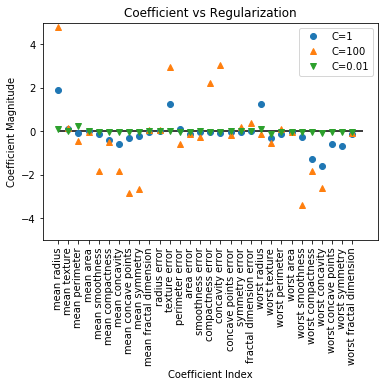

In [404]:
plt.plot(logrec.coef_.T,'o',label='C=1')
plt.plot(logrec100.coef_.T,'^',label='C=100')
plt.plot(logrec01.coef_.T,'v',label='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Coefficient vs Regularization")
plt.legend(loc='best')

## More interpretable model can be built using L1 Regularization

Training accuracy with LR R1 with C :0.001 is - 0.913
Test accuracy with LR R1 with C :0.001 is  - 0.923
Training accuracy with LR R1 with C :1 is - 0.960
Test accuracy with LR R1 with C :1 is  - 0.958
Training accuracy with LR R1 with C :100 is - 0.986
Test accuracy with LR R1 with C :100 is  - 0.979


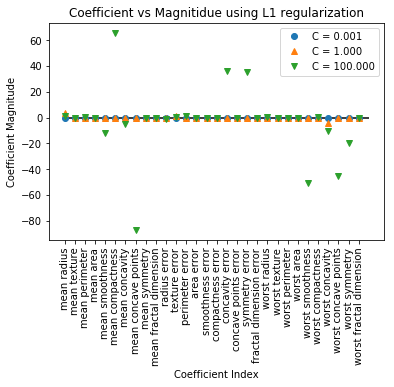

In [411]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_r1=LogisticRegression(penalty='l1',C=C).fit(X_train,y_train)
    print("Training accuracy with LR R1 with C :{} is - {:.3f}".format(C,lr_r1.score(X_train,y_train)))
    print("Test accuracy with LR R1 with C :{} is  - {:.3f}".format(C,lr_r1.score(X_test,y_test)))
    plt.plot(lr_r1.coef_.T,marker,label='C = {:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Coefficient vs Magnitidue using L1 regularization")
plt.legend(loc='best')